In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
all_file=os.listdir('./')
file=[]
for each_file in all_file:
    try:
        if  each_file.split('.')[1]=='csv':
            file.append(each_file)
    except: continue
file

['54.csv',
 '43.csv',
 '57.csv',
 '5.csv',
 '4.csv',
 '42.csv',
 '46.csv',
 '52.csv',
 '1.csv',
 '53.csv',
 '47.csv',
 '51.csv',
 '3.csv',
 '45.csv',
 '44.csv',
 '50.csv',
 '2.csv',
 '23.csv',
 '36.csv',
 '20.csv',
 '34.csv',
 '35.csv',
 '25.csv',
 '31.csv',
 '19.csv',
 '18.csv',
 '24.csv',
 '32.csv',
 '33.csv',
 '16.csv',
 '17.csv',
 '15.csv',
 '14.csv',
 '10.csv',
 '9.csv',
 '8.csv',
 '58.csv',
 '59.csv']

In [3]:
df=None
for f in file:

    data=pd.read_csv(f)
    if df is None:
        df=data
    else:
        df=pd.concat([df,data])
# df=df.drop('Unnamed: 0',axis=1)
df

,date,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,shopping,working
0,01:04:2013,44400.0,18000.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,NaN,NaN,NaN
1,01:05:2013,74401.0,6031.0,1199.0,0.0,0.0,2.0,0.0,0.0,54.0,NaN,NaN,NaN
2,02:04:2013,151009.0,0.0,0.0,3600.0,0.0,1.0,0.0,0.0,54.0,NaN,NaN,NaN
3,02:05:2013,90945.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,54.0,1.000000,NaN,NaN
4,03:04:2013,7201.0,8400.0,0.0,0.0,0.0,2.0,0.0,0.0,54.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,29:03:2013,176400.0,4800.0,0.0,0.0,0.0,4.0,0.0,0.0,59.0,3.800000,NaN,0.0
54,29:04:2013,93601.0,0.0,1201.0,0.0,0.0,0.0,0.0,0.0,59.0,1.571429,NaN,0.0
55,29:05:2013,64201.0,0.0,0.0,1266.0,0.0,2.0,0.0,0.0,59.0,2.000000,NaN,0.0
56,30:04:2013,3599.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59.0,2.666667,NaN,0.0


In [52]:
# df=df.drop('Unnamed: 0',axis=1)
df.describe()

,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,shopping,working,None_school_time
count,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,859.000000,1971.000000,1971.000000,1971.000000
mean,646.236428,121.363267,43.905124,45.624556,36.392187,3.066464,0.304921,56.451040,29.614916,2.136715,4.164891,49.891426,672.400304
std,554.180567,244.528179,157.596315,112.226883,159.246334,1.937644,0.460491,69.971532,18.587900,1.164764,58.990369,206.558983,580.025217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-579.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,120.000000
50%,720.000000,20.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,31.000000,2.000000,0.000000,0.000000,480.000000
75%,1200.000000,119.500000,0.000000,40.000000,0.000000,5.000000,1.000000,115.000000,46.000000,3.000000,0.000000,0.000000,1340.000000
max,1440.000000,1436.000000,1420.000000,1381.000000,1439.000000,6.000000,1.000000,240.000000,59.000000,5.000000,1380.000000,1412.000000,1440.000000


In [6]:
def offset(data):
    try:
        if float(data)>86400:
            return 0
        return data
    except:
        return data
def to_min(time):
    try:
        return int(time/60)
    except: return time
    
time_type='%d:%m:%Y'
week=[]
def transform_week(time):
        time=datetime.strptime(time,time_type)
        return datetime.strftime(time,'%W')
for date in df.date.values:
    week.append(transform_week(date))
df['week']=week
for col in [ 'home_time', 'school_time', 'travel_time',
            'recreational_activities', 'orthers','working', 'shopping']:
    df[col]=df[col].apply(lambda x: offset(x))
    df[col]=df[col].fillna(0)

for col in [ 'home_time', 'school_time', 'travel_time',
            'recreational_activities', 'orthers','working', 'shopping','class_schedule']:
    df[col]=df[col].apply(lambda x: to_min(x))
df['date_in_week']=df['date_in_week'].values+1
df['None_school_time']=1440-df.school_time-df.home_time
df

,date,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,shopping,working,week,None_school_time
0,01:04:2013,740,300,0,0,0,1.0,0.0,0,54.0,NaN,0,0,13,400
1,01:05:2013,1240,100,19,0,0,3.0,0.0,0,54.0,NaN,0,0,17,100
2,02:04:2013,0,0,0,60,0,2.0,0.0,0,54.0,NaN,0,0,13,1440
3,02:05:2013,0,0,0,0,0,4.0,0.0,0,54.0,1.000000,0,0,17,1440
4,03:04:2013,120,140,0,0,0,3.0,0.0,0,54.0,NaN,0,0,13,1180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,29:03:2013,0,80,0,0,0,5.0,0.0,0,59.0,3.800000,0,0,12,1360
54,29:04:2013,0,0,20,0,0,1.0,0.0,0,59.0,1.571429,0,0,17,1440
55,29:05:2013,1070,0,0,21,0,3.0,0.0,0,59.0,2.000000,0,0,21,370
56,30:04:2013,59,0,0,0,0,2.0,0.0,0,59.0,2.666667,0,0,17,1381


In [7]:
from bioinfokit.analys import stat
ANOVA=None
for col in df.columns:
    if col not in ['date','level','volunteer']:
        res = stat()
        res.anova_stat(df=df, res_var='level'
                             , anova_model=f"level ~ C({col})")
#         print(res.anova_summary.iloc[0,:])
        if ANOVA is None:
            ANOVA=res.anova_summary
        else:
            ANOVA=pd.concat([ANOVA,res.anova_summary])

/Users/khangphan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 431, but rank is 244
  warnings.warn('covariance of constraints does not have full '
/Users/khangphan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 218, but rank is 130
  warnings.warn('covariance of constraints does not have full '
/Users/khangphan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 123, but rank is 72
  warnings.warn('covariance of constraints does not have full '
/Users/khangphan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 129, but rank is 5

In [8]:
ANOVA=ANOVA.drop('Residual')

In [9]:
ANOVA['PR(>F)']=ANOVA['PR(>F)']*100

In [10]:
ANOVA['PR(>F)']=ANOVA['PR(>F)'].astype(int)
ANOVA=ANOVA.rename(columns={'PR(>F)':'p_value(%)'})
ANOVA

,df,sum_sq,mean_sq,F,p_value(%)
C(home_time),431.0,558.958289,1.296887,0.939478,71
C(school_time),218.0,298.055793,1.367228,1.009181,46
C(travel_time),123.0,161.309868,1.311462,0.963732,56
C(recreational_activities),129.0,158.827906,1.231224,0.901376,68
C(orthers),109.0,195.185155,1.790689,1.353040,4
C(date_in_week),6.0,13.670057,2.278343,1.687431,12
C(cut_class),1.0,0.021974,0.021974,0.016178,89
C(class_schedule),14.0,25.122986,1.794499,1.329838,18
C(shopping),26.0,36.532863,1.405110,1.036360,41
C(working),111.0,144.311930,1.300107,0.954326,59


In [11]:
import dataframe_image as dfi
dfi.export(ANOVA ,'../ANOVA_table_final_data.png')

In [12]:
df

,date,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,shopping,working,week,None_school_time
0,01:04:2013,740,300,0,0,0,1.0,0.0,0,54.0,NaN,0,0,13,400
1,01:05:2013,1240,100,19,0,0,3.0,0.0,0,54.0,NaN,0,0,17,100
2,02:04:2013,0,0,0,60,0,2.0,0.0,0,54.0,NaN,0,0,13,1440
3,02:05:2013,0,0,0,0,0,4.0,0.0,0,54.0,1.000000,0,0,17,1440
4,03:04:2013,120,140,0,0,0,3.0,0.0,0,54.0,NaN,0,0,13,1180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,29:03:2013,0,80,0,0,0,5.0,0.0,0,59.0,3.800000,0,0,12,1360
54,29:04:2013,0,0,20,0,0,1.0,0.0,0,59.0,1.571429,0,0,17,1440
55,29:05:2013,1070,0,0,21,0,3.0,0.0,0,59.0,2.000000,0,0,21,370
56,30:04:2013,59,0,0,0,0,2.0,0.0,0,59.0,2.666667,0,0,17,1381


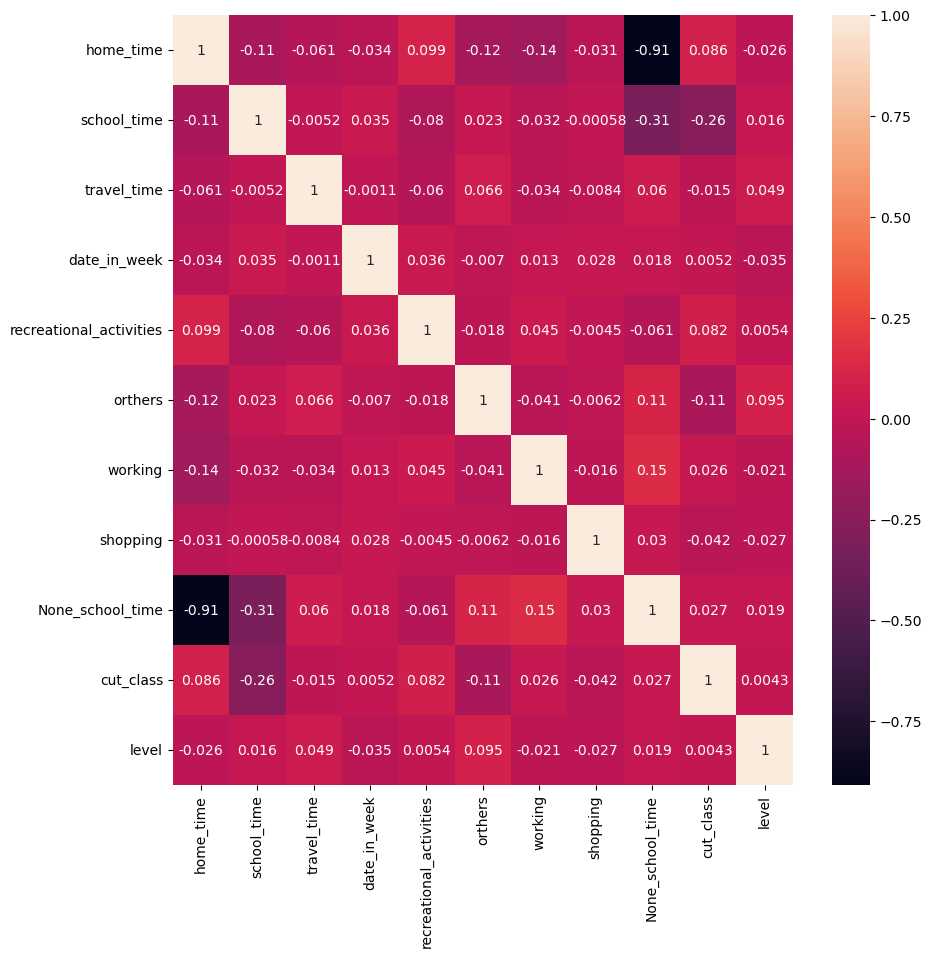

In [13]:
corr=df[[ 'home_time', 'school_time', 'travel_time', 'date_in_week',
        'recreational_activities', 'orthers',
       'working', 'shopping','None_school_time','cut_class','level']].corr()
ax,fig=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.savefig('../image/corr.png')

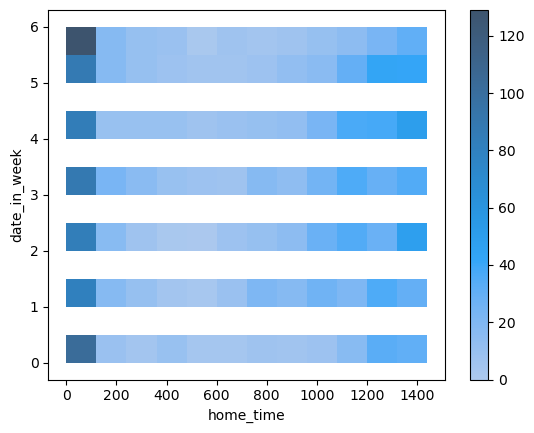

In [14]:
sns.histplot(df,x='home_time',y='date_in_week',cbar=True)
plt.savefig('../image/hometime vs day.png')

In [15]:
df.describe()


,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,shopping,working,None_school_time
count,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,859.000000,1971.000000,1971.000000,1971.000000
mean,646.236428,121.363267,43.905124,45.624556,36.392187,3.066464,0.304921,56.451040,29.614916,2.136715,4.164891,49.891426,672.400304
std,554.180567,244.528179,157.596315,112.226883,159.246334,1.937644,0.460491,69.971532,18.587900,1.164764,58.990369,206.558983,580.025217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-579.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,120.000000
50%,720.000000,20.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,31.000000,2.000000,0.000000,0.000000,480.000000
75%,1200.000000,119.500000,0.000000,40.000000,0.000000,5.000000,1.000000,115.000000,46.000000,3.000000,0.000000,0.000000,1340.000000
max,1440.000000,1436.000000,1420.000000,1381.000000,1439.000000,6.000000,1.000000,240.000000,59.000000,5.000000,1380.000000,1412.000000,1440.000000


In [16]:
df

,date,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,shopping,working,week,None_school_time
0,01:04:2013,740,300,0,0,0,1.0,0.0,0,54.0,NaN,0,0,13,400
1,01:05:2013,1240,100,19,0,0,3.0,0.0,0,54.0,NaN,0,0,17,100
2,02:04:2013,0,0,0,60,0,2.0,0.0,0,54.0,NaN,0,0,13,1440
3,02:05:2013,0,0,0,0,0,4.0,0.0,0,54.0,1.000000,0,0,17,1440
4,03:04:2013,120,140,0,0,0,3.0,0.0,0,54.0,NaN,0,0,13,1180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,29:03:2013,0,80,0,0,0,5.0,0.0,0,59.0,3.800000,0,0,12,1360
54,29:04:2013,0,0,20,0,0,1.0,0.0,0,59.0,1.571429,0,0,17,1440
55,29:05:2013,1070,0,0,21,0,3.0,0.0,0,59.0,2.000000,0,0,21,370
56,30:04:2013,59,0,0,0,0,2.0,0.0,0,59.0,2.666667,0,0,17,1381


In [17]:
df=df.sort_values(['week','date'])
df=df.reset_index(drop=True)
# df=df.drop('date.1',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1971 non-null   object 
 1   home_time                1971 non-null   int64  
 2   school_time              1971 non-null   int64  
 3   travel_time              1971 non-null   int64  
 4   recreational_activities  1971 non-null   int64  
 5   orthers                  1971 non-null   int64  
 6   date_in_week             1971 non-null   float64
 7   cut_class                1971 non-null   float64
 8   class_schedule           1971 non-null   int64  
 9   volunteer                1971 non-null   float64
 10  level                    859 non-null    float64
 11  shopping                 1971 non-null   int64  
 12  working                  1971 non-null   int64  
 13  week                     1971 non-null   object 
 14  None_school_time        

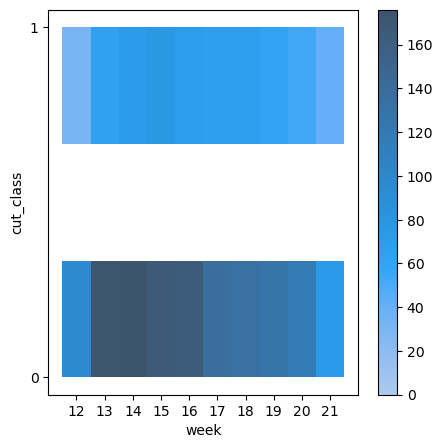

In [18]:
ax,fig=plt.subplots(figsize=(5,5))
sns.histplot(df,x='week',y='cut_class',cbar=True,bins=3)
plt.yticks([0,1])
plt.savefig('../image/cutclass vs week.png')

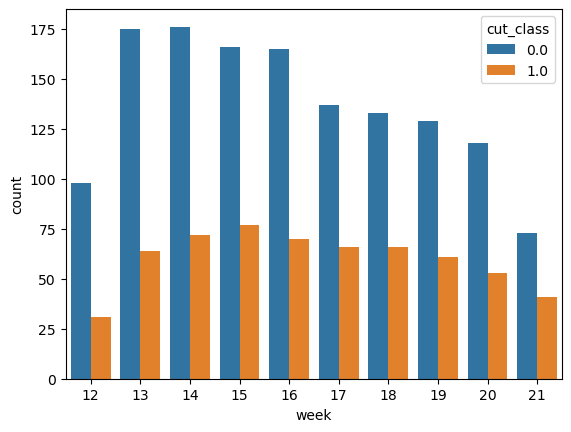

In [19]:
sns.countplot(df,x='week',hue='cut_class')
plt.savefig('../image/count cutclass vs week.png')

In [20]:
print(df['level'].unique())
df_stress=df.iloc[:,1:]
df_stress['level']=df_stress['level'].fillna(df_stress['level'].median())
# df_stress['level']=df_stress['level'].fillna(0)


[       nan 1.         4.         2.75       1.8        4.5
 4.33333333 2.5        3.33333333 2.         1.85714286 1.5
 1.4        3.         3.8        5.         1.75       3.375
 2.8        1.875      1.71428571 1.66666667 2.33333333 4.25
 1.33333333 3.55555556 3.5        1.16666667 1.61538462 2.2
 3.6        1.25       3.25       2.66666667 2.28571429 2.16666667
 1.22222222 1.57142857]


[       nan 1.         4.         2.75       1.8        4.5
 4.33333333 2.5        3.33333333 2.         1.85714286 1.5
 1.4        3.         3.8        5.         1.75       3.375
 2.8        1.875      1.71428571 1.66666667 2.33333333 4.25
 1.33333333 3.55555556 3.5        1.16666667 1.61538462 2.2
 3.6        1.25       3.25       2.66666667 2.28571429 2.16666667
 1.22222222 1.57142857]


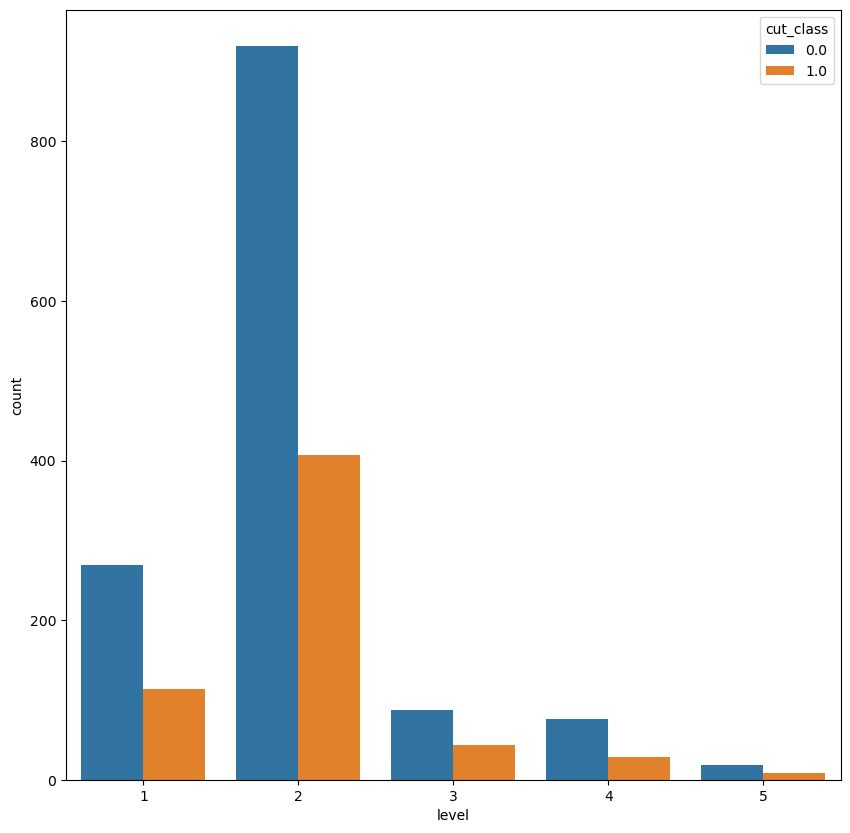

In [21]:
df_stress['level']=df_stress['level'].astype(int)
ax,fig=plt.subplots(figsize=(10,10))
sns.countplot(df_stress,x='level',hue='cut_class')
plt.xticks(rotation=0)
plt.savefig('../image/stress vs cutclass.png')
print(df['level'].unique())

In [22]:
df_stress

,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,shopping,working,week,None_school_time
0,80,79,0,0,0,3.0,0.0,0,57.0,2,0,0,12,1281
1,260,40,0,40,0,3.0,1.0,65,5.0,2,0,0,12,1140
2,0,160,0,0,0,3.0,0.0,130,4.0,1,0,0,12,1280
3,20,320,0,0,0,3.0,0.0,0,1.0,4,0,0,12,1100
4,300,59,0,0,0,3.0,1.0,175,3.0,2,0,0,12,1081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,1233,40,0,0,0,5.0,1.0,150,23.0,2,0,0,21,167
1967,0,0,0,0,0,5.0,1.0,100,36.0,2,0,0,21,1440
1968,60,60,0,0,0,5.0,1.0,150,20.0,2,0,0,21,1320
1969,1020,0,0,320,0,5.0,0.0,0,31.0,2,0,0,21,420


In [53]:
stress_cut_classes=df_stress[df_stress['cut_class']==1]['level']
stress_no_cut_classes=df_stress[df_stress['cut_class']==0]['level']

from scipy.stats import f_oneway
f_oneway(stress_no_cut_classes,stress_cut_classes)

F_onewayResult(statistic=0.0020722235899800576, pvalue=0.9636961086545225)

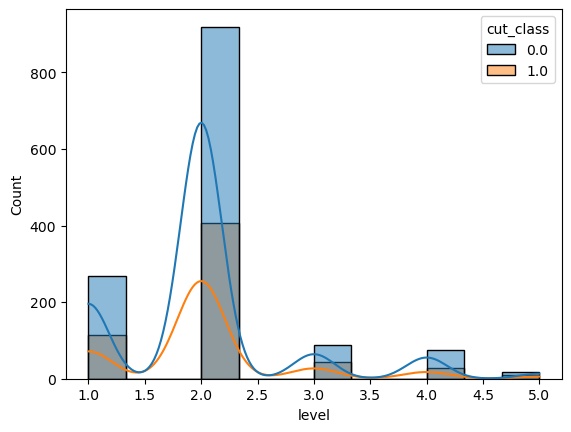

In [24]:
sns.histplot(df_stress,x='level',hue='cut_class',kde=True)
plt.savefig('../image/stress by cut class.png')

In [25]:
no_cut_class_data=df_stress[df_stress['cut_class']==0]
cut_class_data=df_stress[df_stress['cut_class']==1]
no_cut_class_data=no_cut_class_data['level'].value_counts().to_frame()
no_cut_class_data['count']=no_cut_class_data['count']/(no_cut_class_data['count'].sum())
no_cut_class_data
cut_class_data=cut_class_data['level'].value_counts().to_frame()
cut_class_data['count']=cut_class_data['count']/cut_class_data['count'].sum()
cut_class_data

,count
level,
2,0.677205
1,0.189684
3,0.071547
4,0.046589
5,0.014975


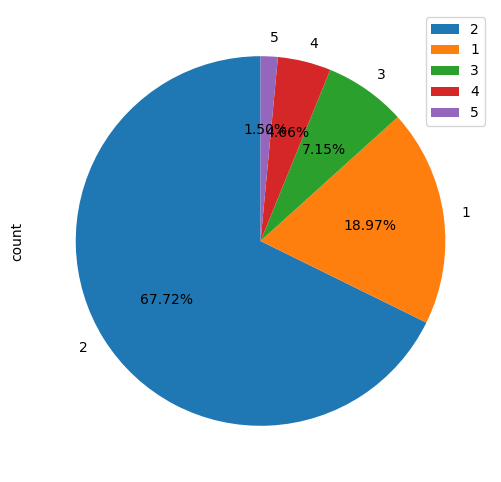

In [26]:
cut_class_data.plot.pie(subplots=True, figsize=(11, 6),startangle=90,autopct='%1.2f%%')
plt.savefig('../image/stress ratio cut class.png')

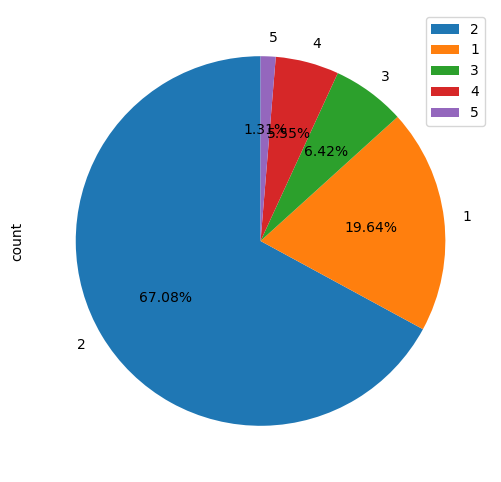

In [27]:
no_cut_class_data.plot.pie(subplots=True, figsize=(11, 6),startangle=90,autopct='%1.2f%%')
plt.savefig('../image/stress ratio no cut class.png')

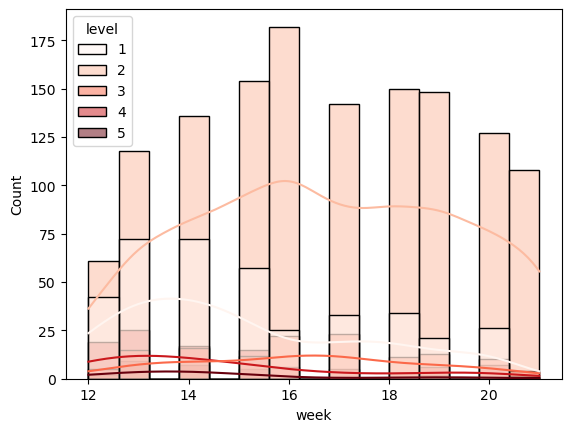

In [56]:
sns.histplot(df_stress,x='week',hue='level',kde=True,palette='Reds')
plt.savefig('../image/stress by week.png')

In [29]:
df_stress_fix=df_stress
df_stress_fix['school_time']=(df_stress_fix['school_time']/60).astype(int)



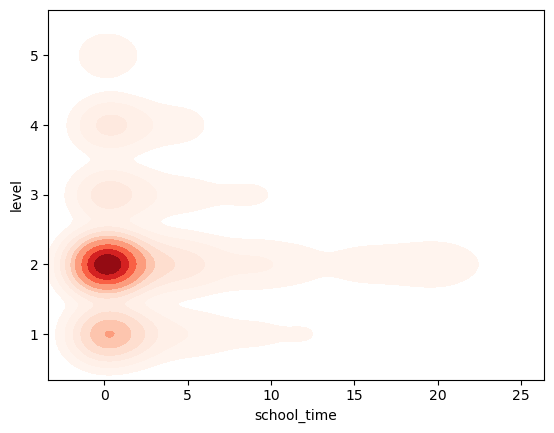

In [30]:
sns.kdeplot(df_stress_fix,x='school_time',y='level',cmap='Reds',fill=True)
plt.savefig('../image/stress by school time.png')

In [31]:
df_stress_fix['None_school_time']=(df_stress_fix['None_school_time']/60).astype(int)

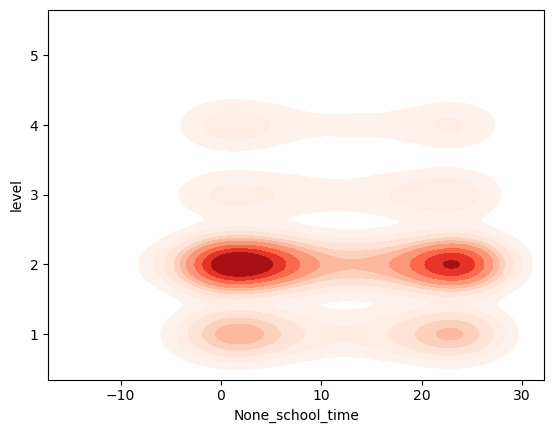

In [32]:
sns.kdeplot(df_stress_fix,x='None_school_time',y='level',cmap='Reds',fill=True)
plt.savefig('../image/stress by none school time.png')

In [33]:
df.info()
df_stress['week']=df_stress['week'].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1971 non-null   object 
 1   home_time                1971 non-null   int64  
 2   school_time              1971 non-null   int64  
 3   travel_time              1971 non-null   int64  
 4   recreational_activities  1971 non-null   int64  
 5   orthers                  1971 non-null   int64  
 6   date_in_week             1971 non-null   float64
 7   cut_class                1971 non-null   float64
 8   class_schedule           1971 non-null   int64  
 9   volunteer                1971 non-null   float64
 10  level                    859 non-null    float64
 11  shopping                 1971 non-null   int64  
 12  working                  1971 non-null   int64  
 13  week                     1971 non-null   object 
 14  None_school_time        

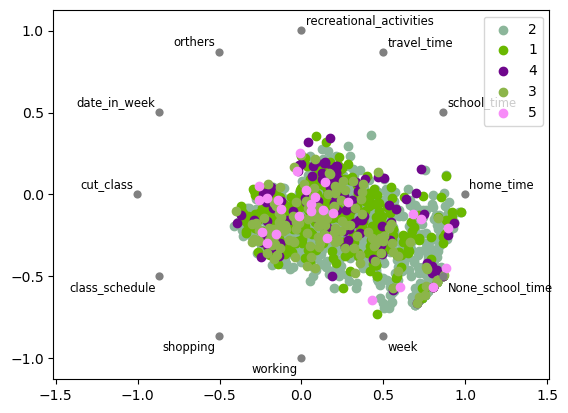

In [34]:
pd.plotting.radviz(df_stress[[ 'home_time', 'school_time', 'travel_time',
       'recreational_activities', 'orthers', 'date_in_week', 'cut_class',
       'class_schedule', 'level', 'shopping', 'working', 'week',
       'None_school_time']],'level')
plt.savefig('../image/radvix.png')

<Axes: xlabel='level', ylabel='count'>

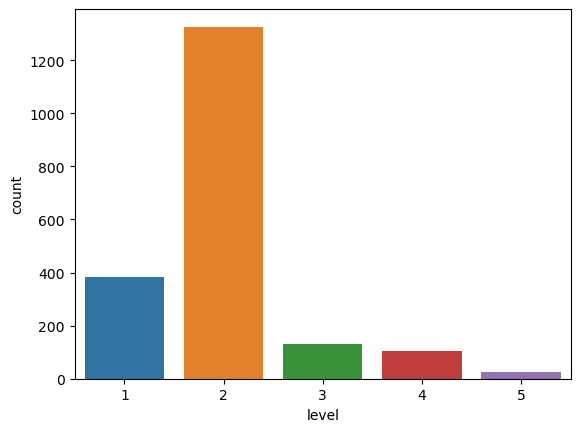

In [35]:
sns.countplot(df_stress,x='level')

In [36]:
df.describe()

,home_time,school_time,travel_time,recreational_activities,orthers,date_in_week,cut_class,class_schedule,volunteer,level,shopping,working,None_school_time
count,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,859.000000,1971.000000,1971.000000,1971.000000
mean,646.236428,121.363267,43.905124,45.624556,36.392187,3.066464,0.304921,56.451040,29.614916,2.136715,4.164891,49.891426,672.400304
std,554.180567,244.528179,157.596315,112.226883,159.246334,1.937644,0.460491,69.971532,18.587900,1.164764,58.990369,206.558983,580.025217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-579.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,120.000000
50%,720.000000,20.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,31.000000,2.000000,0.000000,0.000000,480.000000
75%,1200.000000,119.500000,0.000000,40.000000,0.000000,5.000000,1.000000,115.000000,46.000000,3.000000,0.000000,0.000000,1340.000000
max,1440.000000,1436.000000,1420.000000,1381.000000,1439.000000,6.000000,1.000000,240.000000,59.000000,5.000000,1380.000000,1412.000000,1440.000000


array([  79,   40,  160,  320,   59,  179,   80,  140,  120,   39,   60,
        119,  139,  660, 1066,   20,  240,    0,  960,  339,   99,  180,
        340,  100, 1180,  399, 1320,  279,   19,  380,  239, 1240,  798,
        300,  280,  200,   50,  138,  800, 1019,  260, 1220,   18, 1179,
        440,  360,  579,  720,  980,  220,  451,   78,  560,  539, 1060,
        129,   41,  185,  514,  591,  580, 1360,  219,  620,  559,  500,
       1340,  358,  400, 1020,  319,  760,  540,   58,  281,  900,  640,
        679,   21,  158,   81,   51,  700,  421, 1160,  581, 1300,  449,
        639,  101,  600, 1121,  418,   38,  353,  480,   25,  199,  460,
        420, 1080, 1048, 1176, 1120,  918,  359, 1310,   62, 1207,  520,
       1181,  134,  919, 1291,   95,  939, 1259,  259, 1000,  278,  741,
        161,   61, 1260,  880, 1017,  302,  159,  739,   36, 1001,  341,
        221,  780,  740,  311, 1100, 1219,   66,  563,  189,  165,   22,
        238,  669,  680, 1394,  621,  408,  210,  1

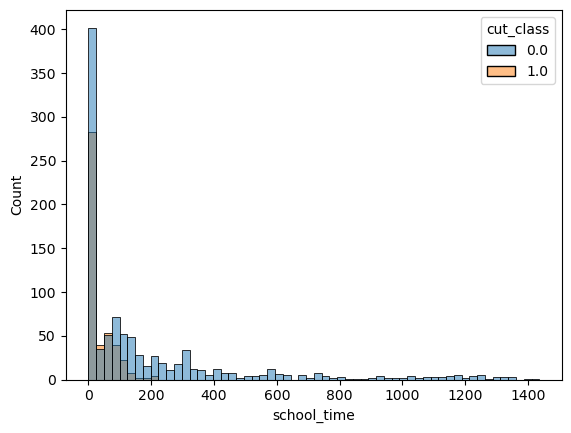

In [37]:
df=df.reset_index(drop=True)
df_new=df.drop(df[df['home_time']==0].index)

sns.histplot(df_new,x='school_time',hue='cut_class')

df_new.describe()
df['school_time'].unique()


In [38]:
df.school_time.value_counts

<bound method IndexOpsMixin.value_counts of 0        79
1        40
2       160
3       320
4        59
       ... 
1966     40
1967      0
1968     60
1969      0
1970    279
Name: school_time, Length: 1971, dtype: int64>

In [39]:
df.columns

Index(['date', 'home_time', 'school_time', 'travel_time',
       'recreational_activities', 'orthers', 'date_in_week', 'cut_class',
       'class_schedule', 'volunteer', 'level', 'shopping', 'working', 'week',
       'None_school_time'],
      dtype='object')

In [40]:
y=df['level']
y.unique()

array([       nan, 1.        , 4.        , 2.75      , 1.8       ,
       4.5       , 4.33333333, 2.5       , 3.33333333, 2.        ,
       1.85714286, 1.5       , 1.4       , 3.        , 3.8       ,
       5.        , 1.75      , 3.375     , 2.8       , 1.875     ,
       1.71428571, 1.66666667, 2.33333333, 4.25      , 1.33333333,
       3.55555556, 3.5       , 1.16666667, 1.61538462, 2.2       ,
       3.6       , 1.25      , 3.25      , 2.66666667, 2.28571429,
       2.16666667, 1.22222222, 1.57142857])

In [41]:
X=df[[ 'home_time', 'school_time', 'travel_time',
       'recreational_activities', 'orthers', 'date_in_week', 'cut_class',
       'class_schedule' ,  'shopping', 'working',
       'week', 'None_school_time']]
y=df['level']
y=y.fillna(y.median())
y=10*y
y=y.astype(int)
y.unique()

array([20, 10, 40, 27, 18, 45, 43, 25, 33, 15, 14, 30, 38, 50, 17, 28, 16,
       23, 42, 13, 35, 11, 22, 36, 12, 32, 26, 21])

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train, X_vad, y_train, y_vad = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_ML, X_vad_ML, y_train_ML, y_vad_ML= X_train, X_vad, y_train, y_vad

X_train = scaler.fit_transform(X_train)

X_vad = scaler.fit_transform(X_vad)
X.shape


(1971, 12)

In [43]:
y.unique()

array([20, 10, 40, 27, 18, 45, 43, 25, 33, 15, 14, 30, 38, 50, 17, 28, 16,
       23, 42, 13, 35, 11, 22, 36, 12, 32, 26, 21])

In [44]:
y.describe()

count    1971.000000
mean       20.579909
std         7.710832
min        10.000000
25%        20.000000
50%        20.000000
75%        20.000000
max        50.000000
Name: level, dtype: float64

In [45]:
# from xgboost import XGBClassifier#XGBcalssifier
# seed=200
# model=XGBClassifier (use_label_encoder=False, eval_metric='logloss', random_state=seed)
# model.fit(X_train,y_train)
# prediction1=model.predict(X_vad)
# print('Accuracy for XBG is ',metrics.accuracy_score(prediction1,y_vad))

In [46]:
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn import metrics #accuracy measure
from sklearn.linear_model import LogisticRegression #logistic regression

Accuracy for KN is  0.6075949367088608


<Axes: >

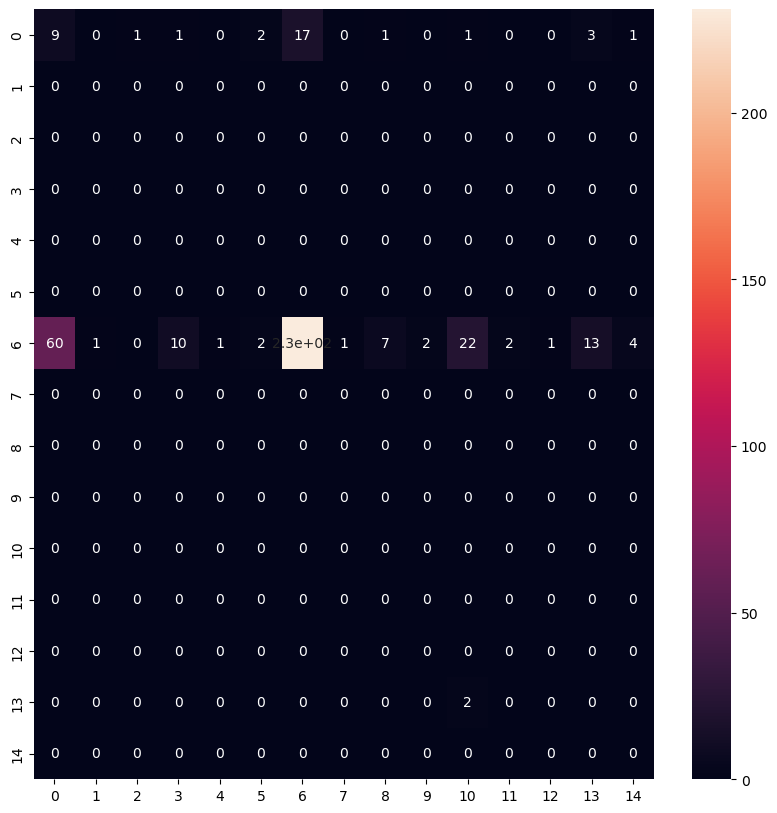

In [47]:
model=KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,y_train)
prediction1=model.predict(X_vad)
print('Accuracy for KN is ',metrics.accuracy_score(prediction1,y_vad))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad)
sns.heatmap(conf,annot=True)

Accuracy for LR is  0.6177215189873417


/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

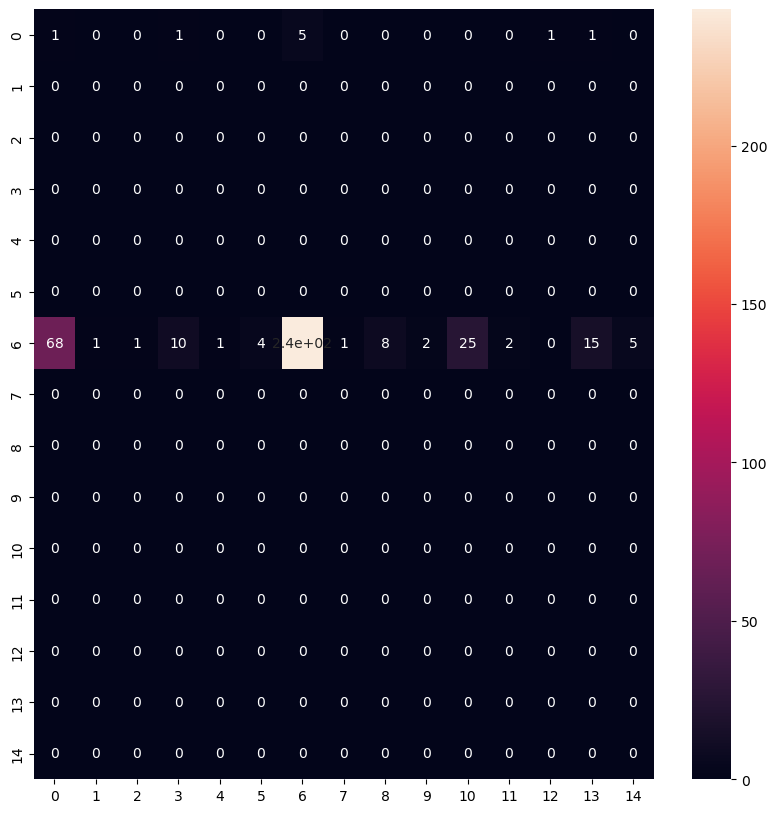

In [48]:
model=LogisticRegression()
model.fit(X_train,y_train)
prediction1=model.predict(X_vad)
print('Accuracy for LR is ',metrics.accuracy_score(prediction1,y_vad))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad)
sns.heatmap(conf,annot=True)

Accuracy for SVM is  0.6278481012658228


<Axes: >

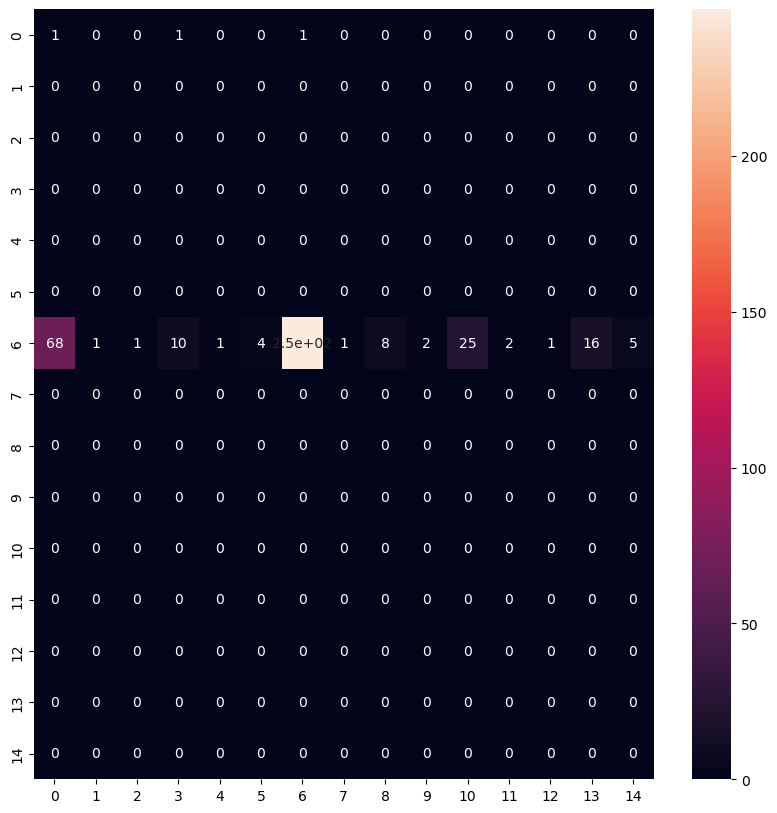

In [49]:
from sklearn import svm #support vector Machine
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train,y_train)
prediction1=model.predict(X_vad)
print('Accuracy for SVM is ',metrics.accuracy_score(prediction1,y_vad))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad)
sns.heatmap(conf,annot=True)